In [35]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%matplotlib inline

In [39]:
%autoreload

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [47]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
import matplotlib.colors as colors

import numpy as np

RESOLUTION = 600

POS_N1 = (0.5, 2)
POS_N2 = (0.5, 0.5)

C = 299792458
FREQ = 868E6
PPM = (-25.0, 25.0)

AREA = (2.5,2.5)
TIME = (0.0, 1.0, 0.01)

r1 = np.array([[np.linalg.norm([i / RESOLUTION * AREA[0] - POS_N1[0], j / RESOLUTION * AREA[1] - POS_N1[1]]) for j in range(RESOLUTION)] for i in range(RESOLUTION)])
r2 = np.array([[np.linalg.norm([i / RESOLUTION * AREA[0] - POS_N2[0], j / RESOLUTION * AREA[1] - POS_N2[1]]) for j in range(RESOLUTION)] for i in range(RESOLUTION)])

def field(t, r):
    rel_t = t - r / C
    after_pulse = np.greater_equal(rel_t, 0)
    r_clip = np.clip(r, 0.1, None)

    return after_pulse * np.sin(rel_t * FREQ * 2 * np.pi) / np.sqrt(r_clip)
    
@interact(t=TIME)
def visualize_field(t=0.0):
    t = t * AREA[0] / C
                      
    data = field(t, r1) + field(t, r2)
    
    imgplot = plt.imshow(data, vmin=-1.0, vmax=1.0,cmap='RdBu_r', animated=True)
    plt.axis('off')
    plt.suptitle('Interference Pattern')
    plt.title('($t={:.2f}\mu s$, 868 MHz)'.format(t * 1E9))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

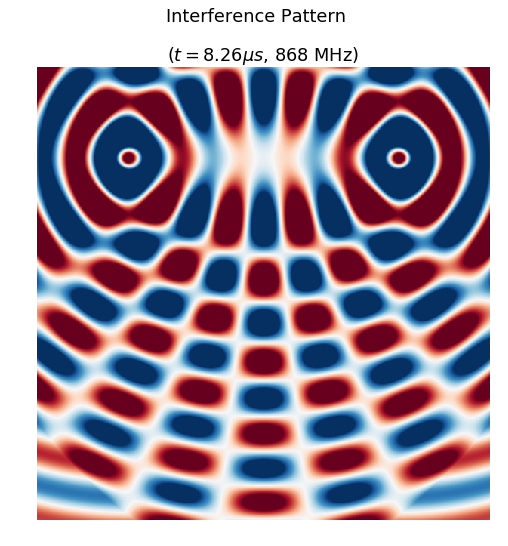

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

dpi = 80
fig = plt.figure(figsize=(RESOLUTION/dpi, RESOLUTION/dpi), dpi=dpi)
              
plt.axis('off')
plt.suptitle('Interference Pattern', fontsize=16)
ttl = plt.title('($t={:.2f}\mu s$, 868 MHz)'.format(0), animated=True, fontsize=14)
data = field(0, r1) + field(0, r2)
im = plt.imshow(data, vmin=-1.0, vmax=1.0,cmap='RdBu_r', animated=True)


# animation function. This is called sequentially
def update(i):
    t = i * 0.01 * AREA[0] / C
    data = field(t, r1) + field(t, r2)
    ttl.set_text('($t={:.2f}\mu s$, 868 MHz)'.format(t * 1E9))
    im.set_array(data)
    return im, ttl,

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

HTML(anim.to_html5_video())

In [56]:
def power_field(t, r1, r2, ppm):
    phase_diff = (r1 - (r2 - (t * ppm * C))) / C * FREQ

    return np.cos(phase_diff * 2 * np.pi)

@interact(ppm=PPM, t=TIME)
def visualize_field(ppm=0.0, t=0.0):
    t = t * 0.001
    ppm = ppm * 1E-6
                      
    data = power_field(t, r1, r2, ppm)
    imgplot = plt.imshow(data, vmin=-1.0, vmax=1.0,cmap='viridis')
    plt.axis('off')
    plt.suptitle('Interference Power Distribution')
    plt.title('($t={:.2f}ms$, 868 MHz @ {:.2f}ppm)'.format(t*1000, ppm))

interactive(children=(FloatSlider(value=0.0, description='ppm', max=25.0, min=-25.0), FloatSlider(value=0.0, d…

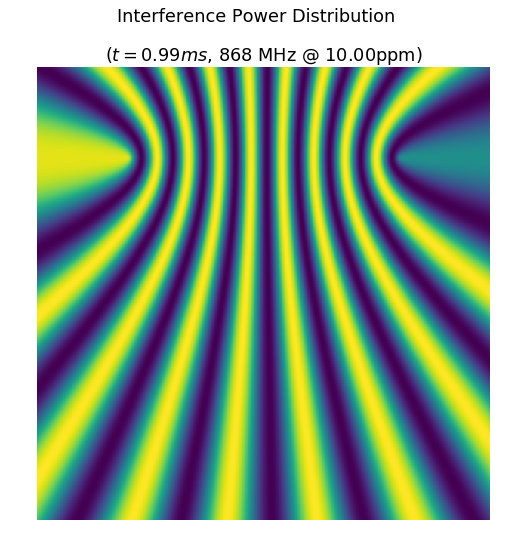

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

dpi = 80
fig = plt.figure(figsize=(RESOLUTION/dpi, RESOLUTION/dpi), dpi=dpi)

ppm = 10 * 1E-6
              
plt.axis('off')
plt.suptitle('Interference Power Distribution', fontsize=16)
ttl = plt.title('($t={:.2f}ms$, 868 MHz @ {:.2f}ppm)'.format(0, ppm), animated=True, fontsize=16)
data = power_field(0, r1, r2, ppm)
im = plt.imshow(data, vmin=-1.0, vmax=1.0,cmap='viridis', animated=True)

# animation function. This is called sequentially
def update(i):
    t = i * 0.01 * 0.001
    data = power_field(t, r1, r2, ppm)
    ttl.set_text('($t={:.2f}ms$, 868 MHz @ {:.2f}ppm)'.format(t*1000, ppm * 1E6))
    im.set_array(data)
    return im, ttl,

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

HTML(anim.to_html5_video())